In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

file_path = r'C:\Users\lucas\Downloads\FYM\Compiled Daytona.csv'
data = pd.read_csv(file_path)

data.head()

,Year,Car,Position,Lap,Gap Before Pit,Laps Until Front Car Pit,Stint,Front Car Stint,Passed
0,2022,59.0,13,112.0,1.059,19.0,9.5,28.0,0
1,2022,57.0,6,199.0,4.326,0.0,17.0,26.5,1
2,2022,57.0,2,487.0,0.611,0.0,21.5,16.5,1
3,2022,57.0,3,517.0,4.268,0.0,27.0,27.0,0
4,2022,57.0,3,528.0,1.774,20.0,10.0,30.0,0


In [214]:
data['Stint Difference'] = data.apply(lambda row: row['Stint'] - row['Front Car Stint'], axis=1)
data.head()

,Year,Car,Position,Lap,Gap Before Pit,Laps Until Front Car Pit,Stint,Front Car Stint,Passed,Stint Difference
0,2022,59.0,13,112.0,1.059,19.0,9.5,28.0,0,-18.5
1,2022,57.0,6,199.0,4.326,0.0,17.0,26.5,1,-9.5
2,2022,57.0,2,487.0,0.611,0.0,21.5,16.5,1,5.0
3,2022,57.0,3,517.0,4.268,0.0,27.0,27.0,0,0.0
4,2022,57.0,3,528.0,1.774,20.0,10.0,30.0,0,-20.0


C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\3332344465.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percent_passed = binned_data.groupby(binned_data).apply(lambda x: passed[x.index].mean() * 100)


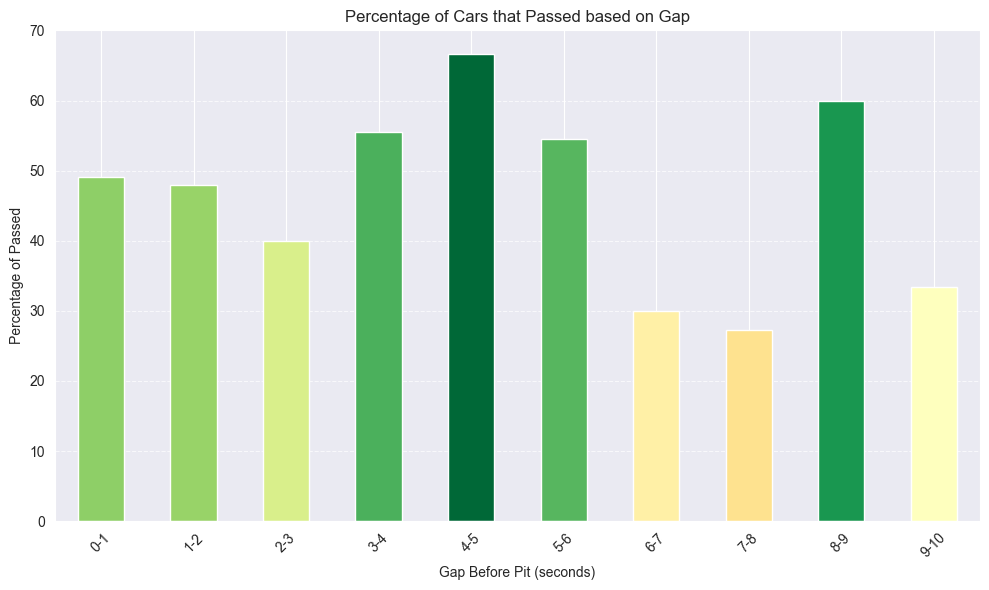

In [215]:
gap_before_pit = data['Gap Before Pit']
passed = data['Passed']

# Define the bins and bin labels
bins = np.arange(0, 11, 1)
bin_labels = [f'{i}-{i+1}' for i in range(10)]

# Cut the 'Gap Before Pit' data into bins
binned_data = pd.cut(gap_before_pit, bins=bins, labels=bin_labels, right=False)

# Calculate the percentage of rows in each bin with a 'Passed' value of 1
percent_passed = binned_data.groupby(binned_data).apply(lambda x: passed[x.index].mean() * 100)


colors = cm.RdYlGn(percent_passed / percent_passed.max())

# Plotting the bar chart for 'Stint'
plt.figure(figsize=(10, 6))
percent_passed.plot(kind='bar', color=colors)
plt.title('Percentage of Cars that Passed based on Gap')
plt.xlabel('Gap Before Pit (seconds)')
plt.ylabel('Percentage of Passed')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\999558735.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stint_percent_passed = stint_binned_data.groupby(stint_binned_data).apply(lambda x: data['Passed'][x.index].mean() * 100)


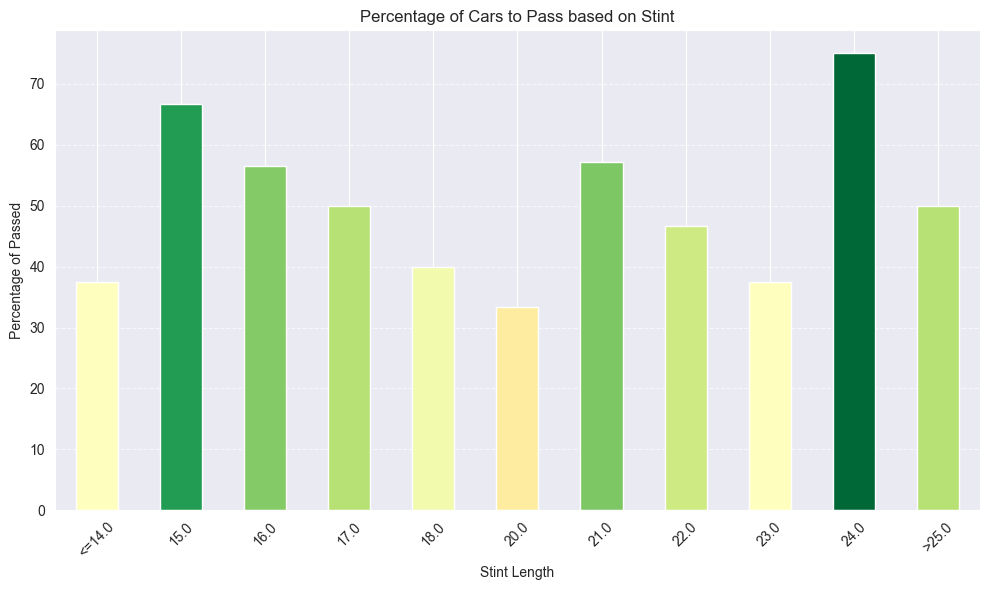

In [216]:
stint_median = data['Stint'].median()

# Define the range for bins
bin_range = 5  # Adjust this range as needed to ensure coverage of the data

# Create bins centered around the median
stint_bins = [
    stint_median - 5.5, stint_median - 4.5, stint_median - 3.5, stint_median - 2.5, 
    stint_median - 1.5, stint_median - 0.5, stint_median + 0.5, stint_median + 1.5, 
    stint_median + 2.5, stint_median + 3.5, stint_median + 4.5, stint_median + 5.5
]
stint_labels = [
    f'<={stint_median - 5.5}', f'{stint_median - 4.5}', f'{stint_median - 3.5}', f'{stint_median - 2.5}', f'{stint_median - 1.5}', f'{stint_median+.5}', 
    f'{stint_median + 1.5}', f'{stint_median + 2.5}', f'{stint_median + 3.5}', f'{stint_median + 4.5}', f'>{stint_median + 5.5}'
]

# Cut the 'Stint' data into bins
stint_binned_data = pd.cut(data['Stint'], bins=stint_bins, labels=stint_labels, right=False)

# Calculate the percentage of rows in each bin with a 'Passed' value of 1
stint_percent_passed = stint_binned_data.groupby(stint_binned_data).apply(lambda x: data['Passed'][x.index].mean() * 100)

colors = cm.RdYlGn(stint_percent_passed / stint_percent_passed.max())

# Plotting the bar chart for 'Stint'
plt.figure(figsize=(10, 6))
stint_percent_passed.plot(kind='bar', color=colors)
plt.title('Percentage of Cars to Pass based on Stint')
plt.xlabel('Stint Length')
plt.ylabel('Percentage of Passed')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\666654041.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passed_percentages = binned_df.groupby(['Gap Before Pit', 'Stint']).mean()['Passed'] * 100
C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\666654041.py:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


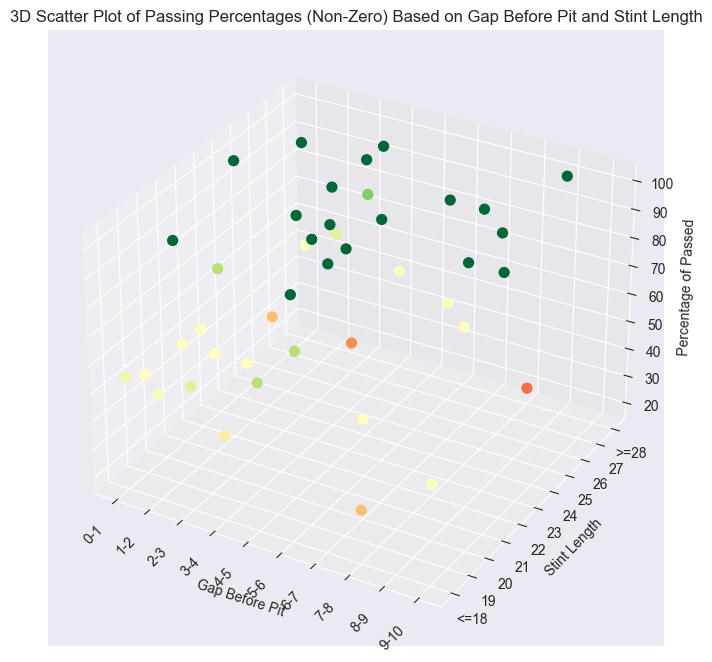

In [217]:
gap_bins = np.arange(0, 11, 1)
gap_labels = [f'{i}-{i+1}' for i in range(10)]

# Binning 'Gap Before Pit'
gap_binned_data = pd.cut(data['Gap Before Pit'], bins=gap_bins, labels=gap_labels, right=False)

# Define bins and labels for 'Stint'
stint_bins = [0, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, np.inf]
stint_labels = ['<=18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '>=28']

# Binning 'Stint'
stint_binned_data = pd.cut(data['Stint'], bins=stint_bins, labels=stint_labels, right=False)

# Create a DataFrame to hold the binned data and 'Passed' values
binned_df = pd.DataFrame({
    'Gap Before Pit': gap_binned_data,
    'Stint': stint_binned_data,
    'Passed': data['Passed']
})

# Calculate the percentage of 'Passed' = 1 in each (Gap, Stint) combination
passed_percentages = binned_df.groupby(['Gap Before Pit', 'Stint']).mean()['Passed'] * 100
passed_percentages = passed_percentages.unstack().fillna(0)

# Prepare the data for plotting
xpos, ypos = np.meshgrid(np.arange(passed_percentages.shape[0]), np.arange(passed_percentages.shape[1]), indexing='ij')
xpos = xpos.flatten()
ypos = ypos.flatten()
dz = passed_percentages.values.flatten()

# Filter out zero values
non_zero_indices = dz > 0
xpos_non_zero = xpos[non_zero_indices]
ypos_non_zero = ypos[non_zero_indices]
dz_non_zero = dz[non_zero_indices]

# Plotting the 3D scatter plot without zeros
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a color map for the dot colors
colors_non_zero = cm.RdYlGn(dz_non_zero / dz_non_zero.max())

# Plotting the scatter plot with uniform dot size and solid color
ax.scatter(xpos_non_zero, ypos_non_zero, dz_non_zero, c=colors_non_zero, s=50, alpha=1)

# Setting the labels
ax.set_xlabel('Gap Before Pit')
ax.set_ylabel('Stint Length')
ax.set_zlabel('Percentage of Passed')

# Setting the ticks with labels
ax.set_xticks(np.arange(len(gap_labels)))
ax.set_xticklabels(gap_labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(stint_labels)))
ax.set_yticklabels(stint_labels)

plt.title('3D Scatter Plot of Passing Percentages (Non-Zero) Based on Gap Before Pit and Stint Length')
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\3550283348.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passed_percentages = binned_df.groupby(['Gap Before Pit', 'Stint']).mean()['Passed'] * 100
C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\3550283348.py:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


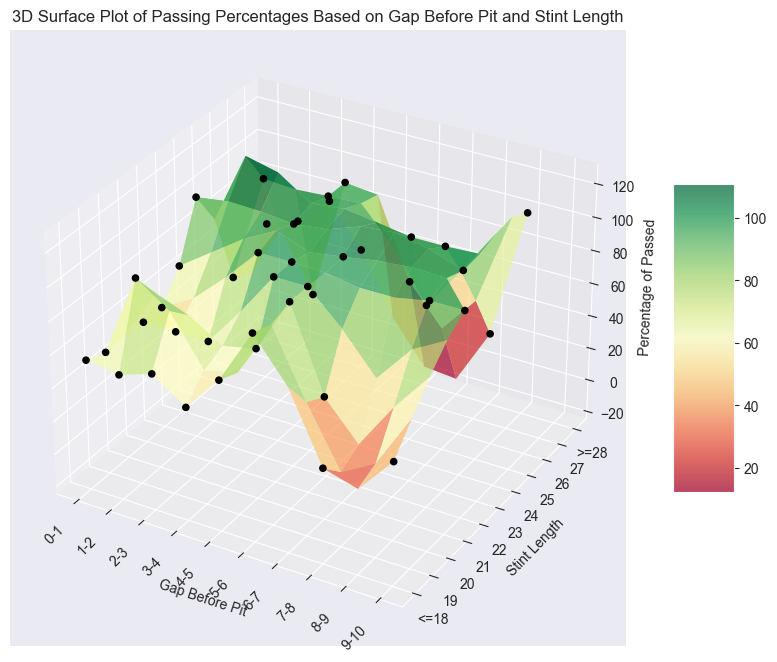

In [218]:
from scipy.interpolate import griddata
gap_bins = np.arange(0, 11, 1)
gap_labels = [f'{i}-{i+1}' for i in range(10)]

# Binning 'Gap Before Pit'
gap_binned_data = pd.cut(data['Gap Before Pit'], bins=gap_bins, labels=gap_labels, right=False)

# Define bins and labels for 'Stint'
stint_bins = [0, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, np.inf]
stint_labels = ['<=18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '>=28']

# Binning 'Stint'
stint_binned_data = pd.cut(data['Stint'], bins=stint_bins, labels=stint_labels, right=False)

# Create a DataFrame to hold the binned data and 'Passed' values
binned_df = pd.DataFrame({
    'Gap Before Pit': gap_binned_data,
    'Stint': stint_binned_data,
    'Passed': data['Passed']
})

# Calculate the percentage of 'Passed' = 1 in each (Gap, Stint) combination
passed_percentages = binned_df.groupby(['Gap Before Pit', 'Stint']).mean()['Passed'] * 100
passed_percentages = passed_percentages.unstack().fillna(0)

# Prepare the data for plotting
xpos, ypos = np.meshgrid(np.arange(passed_percentages.shape[0]), np.arange(passed_percentages.shape[1]), indexing='ij')
xpos = xpos.flatten()
ypos = ypos.flatten()
dz = passed_percentages.values.flatten()

# Filter out zero values
non_zero_indices = dz > 0
xpos_non_zero = xpos[non_zero_indices]
ypos_non_zero = ypos[non_zero_indices]
dz_non_zero = dz[non_zero_indices]

# Define the range for the surface plot
x_range = np.arange(passed_percentages.shape[0])
y_range = np.arange(passed_percentages.shape[1])

# Create a meshgrid for the surface plot
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Interpolate the dz values onto the grid
z_grid = griddata((xpos_non_zero, ypos_non_zero), dz_non_zero, (x_grid, y_grid), method='cubic')

# Plotting the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='RdYlGn', edgecolor='none', alpha=0.7)

# Plot the original points on the surface
ax.scatter(xpos_non_zero, ypos_non_zero, dz_non_zero, color='black', s=20, alpha=1)

# Adding color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Setting the labels
ax.set_xlabel('Gap Before Pit')
ax.set_ylabel('Stint Length')
ax.set_zlabel('Percentage of Passed')

# Setting the ticks with labels
ax.set_xticks(np.arange(len(gap_labels)))
ax.set_xticklabels(gap_labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(stint_labels)))
ax.set_yticklabels(stint_labels)

plt.title('3D Surface Plot of Passing Percentages Based on Gap Before Pit and Stint Length')
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18596\2627688292.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stint_diff_passed_percent = diff_data.groupby('Stint Diff Binned')['Passed'].mean() * 100


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

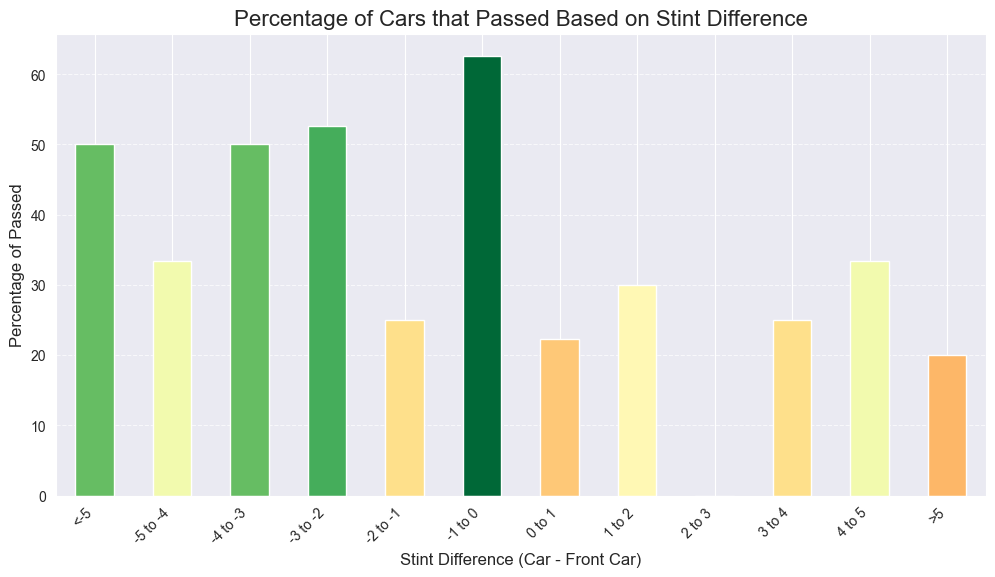

In [219]:
import matplotlib.colors as mcolors
diff_data = pd.DataFrame()
diff_data['Stint'] = data['Stint']
diff_data['Front Car Stint'] = data['Front Car Stint']
diff_data['Passed'] = data['Passed']
diff_data['Stint Difference'] = diff_data['Stint'] - diff_data['Front Car Stint']
diff_data['Gap Before Pit'] = data['Gap Before Pit']
# Define new bins for the 'Stint Difference' with single lap increments
stint_diff_bins = [-np.inf, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, np.inf]
stint_diff_labels = ['<-5', '-5 to -4', '-4 to -3', '-3 to -2', '-2 to -1', '-1 to 0', '0 to 1', '1 to 2', '2 to 3', '3 to 4', '4 to 5', '>5']

# Bin the 'Stint Difference' diff_data with new bins
diff_data['Stint Diff Binned'] = pd.cut(diff_data['Stint Difference'], bins=stint_diff_bins, labels=stint_diff_labels)

# Calculate the percentage of 'Passed' = 1 in each 'Stint Diff' bin
stint_diff_passed_percent = diff_data.groupby('Stint Diff Binned')['Passed'].mean() * 100

# Normalize the diff_data to [0, 1] range
norm = mcolors.Normalize(vmin=stint_diff_passed_percent.min(), vmax=stint_diff_passed_percent.max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])  # Only needed for the colorbar

# Apply the colormap to the normalized diff_data
colors = [sm.to_rgba(value) for value in stint_diff_passed_percent]

# Plotting the bar chart with the colormap
plt.figure(figsize=(12, 6))
stint_diff_passed_percent.plot(kind='bar', color=colors)
plt.title('Percentage of Cars that Passed Based on Stint Difference', fontsize=16)
plt.xlabel('Stint Difference (Car - Front Car)', fontsize=12)
plt.ylabel('Percentage of Passed', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add color bar
plt.colorbar(sm, orientation='vertical', label='Percentage of Passed')

plt.tight_layout()
plt.show()

In [ ]:
stint_diff_median = diff_data['Stint Difference'].median()

# Define bins with each bin being 2 units apart, centered around the median
stint_diff_bins = [
    diff_data['Stint Difference'].min(), stint_diff_median - 7, stint_diff_median - 5, stint_diff_median - 3, stint_diff_median - 1,
    stint_diff_median + 1, stint_diff_median + 3, stint_diff_median + 5, stint_diff_median + 7, diff_data['Stint Difference'].max()
]

# Create labels for the bins
stint_diff_labels = [
    f'<= {stint_diff_bins[1]:.1f}', f'{stint_diff_bins[1]:.1f}-{stint_diff_bins[2]:.1f}', f'{stint_diff_bins[2]:.1f}-{stint_diff_bins[3]:.1f}', 
    f'{stint_diff_bins[3]:.1f}-{stint_diff_bins[4]:.1f}', f'{stint_diff_bins[4]:.1f}-{stint_diff_bins[5]:.1f}', 
    f'{stint_diff_bins[5]:.1f}-{stint_diff_bins[6]:.1f}', f'{stint_diff_bins[6]:.1f}-{stint_diff_bins[7]:.1f}', 
    f'>= {stint_diff_bins[7]:.1f}'
]

# Correct the number of labels by removing one bin edge
stint_diff_bins = stint_diff_bins[:-1]

# Define bins and labels for 'Gap Before Pit' with 8 bins
gap_bins = np.linspace(diff_data['Gap Before Pit'].min(), diff_data['Gap Before Pit'].max(), 9)
gap_labels = [f'{gap_bins[i]:.1f}-{gap_bins[i+1]:.1f}' for i in range(len(gap_bins)-1)]

# Bin the 'Gap Before Pit' and 'Stint Difference' diff_data
gap_binned_diff_data = pd.cut(diff_data['Gap Before Pit'], bins=gap_bins, labels=gap_labels, right=False)
stint_diff_binned_diff_data = pd.cut(diff_data['Stint Difference'], bins=stint_diff_bins, labels=stint_diff_labels, right=False)

# Create a DataFrame for binned data and 'Passed' values
binned_df_diff = pd.DataFrame({
    'Gap Before Pit': gap_binned_diff_data,
    'Stint Difference': stint_diff_binned_diff_data,
    'Passed': diff_data['Passed']
})

# Calculate the percentage of 'Passed' = 1 in each (Gap, Stint Difference) combination
passed_percentages_diff = binned_df_diff.groupby(['Gap Before Pit', 'Stint Difference']).mean()['Passed'] * 100
passed_percentages_diff = passed_percentages_diff.unstack().fillna(0)

# Prepare the data for plotting
xpos_diff, ypos_diff = np.meshgrid(np.arange(passed_percentages_diff.shape[0]), np.arange(passed_percentages_diff.shape[1]), indexing='ij')
xpos_diff = xpos_diff.flatten()
ypos_diff = ypos_diff.flatten()
dz_diff = passed_percentages_diff.values.flatten()

# Filter out zero values
non_zero_indices_diff = dz_diff > 0
xpos_diff_non_zero = xpos_diff[non_zero_indices_diff]
ypos_diff_non_zero = ypos_diff[non_zero_indices_diff]
dz_diff_non_zero = dz_diff[non_zero_indices_diff]

# Define the range for the surface plot
x_range_diff = np.arange(passed_percentages_diff.shape[0])
y_range_diff = np.arange(passed_percentages_diff.shape[1])

# Interpolate the dz values onto a finer grid for smoother surface plot
x_range_diff_fine = np.linspace(x_range_diff.min(), x_range_diff.max(), 40)
y_range_diff_fine = np.linspace(y_range_diff.min(), y_range_diff.max(), 40)
x_grid_diff_fine, y_grid_diff_fine = np.meshgrid(x_range_diff_fine, y_range_diff_fine)

# Use cubic interpolation for a smoother surface
z_grid_diff_fine = griddata((xpos_diff_non_zero, ypos_diff_non_zero), dz_diff_non_zero, (x_grid_diff_fine, y_grid_diff_fine), method='cubic')

# Plotting the smoothed 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the smoothed surface
surf_diff_fine = ax.plot_surface(x_grid_diff_fine, y_grid_diff_fine, z_grid_diff_fine, cmap='RdYlGn', edgecolor='none', alpha=0.8)

# Plot the original points on the surface
ax.scatter(xpos_diff_non_zero, ypos_diff_non_zero, dz_diff_non_zero, color='black', s=20, alpha=1)

# Adding color bar for reference
fig.colorbar(surf_diff_fine, ax=ax, shrink=0.5, aspect=5)

# Setting the labels
ax.set_xlabel('Gap Before Pit')
ax.set_ylabel('Stint Difference')
ax.set_zlabel('Percentage of Passed')

# Setting the ticks with labels
ax.set_xticks(np.arange(len(gap_labels)))
ax.set_xticklabels(gap_labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(stint_diff_labels)))
ax.set_yticklabels(stint_diff_labels)

plt.title('Smoothed 3D Surface Plot of Passing Percentages Based on Gap Before Pit and Stint Difference')
plt.tight_layout()
plt.show()

In [ ]:
stint_diff_bins = [
    diff_data['Stint Difference'].min(), stint_diff_median - 7, stint_diff_median - 5, stint_diff_median - 3, stint_diff_median - 1,
    stint_diff_median + 1, stint_diff_median + 3, stint_diff_median + 5, stint_diff_median + 7, diff_data['Stint Difference'].max()
]

# Create labels for the bins
stint_diff_labels = [
    f'<= {stint_diff_bins[1]:.1f}', f'{stint_diff_bins[1]:.1f}-{stint_diff_bins[2]:.1f}', f'{stint_diff_bins[2]:.1f}-{stint_diff_bins[3]:.1f}', 
    f'{stint_diff_bins[3]:.1f}-{stint_diff_bins[4]:.1f}', f'{stint_diff_bins[4]:.1f}-{stint_diff_bins[5]:.1f}', 
    f'{stint_diff_bins[5]:.1f}-{stint_diff_bins[6]:.1f}', f'{stint_diff_bins[6]:.1f}-{stint_diff_bins[7]:.1f}', 
    f'>= {stint_diff_bins[7]:.1f}'
]

# Correct the number of labels by removing one bin edge
stint_diff_bins = stint_diff_bins[:-1]

# Define bins and labels for 'Gap Before Pit' with 8 bins
gap_bins = np.linspace(diff_data['Gap Before Pit'].min(), diff_data['Gap Before Pit'].max(), 9)
gap_labels = [f'{gap_bins[i]:.1f}-{gap_bins[i+1]:.1f}' for i in range(len(gap_bins)-1)]

# Bin the 'Gap Before Pit' and 'Stint Difference' diff_data
gap_binned_diff_data = pd.cut(diff_data['Gap Before Pit'], bins=gap_bins, labels=gap_labels, right=False)
stint_diff_binned_diff_data = pd.cut(diff_data['Stint Difference'], bins=stint_diff_bins, labels=stint_diff_labels, right=False)

# Create a DataFrame for binned data and 'Passed' values
binned_df_diff = pd.DataFrame({
    'Gap Before Pit': gap_binned_diff_data,
    'Stint Difference': stint_diff_binned_diff_data,
    'Passed': diff_data['Passed']
})

# Calculate the percentage of 'Passed' = 1 in each (Gap, Stint Difference) combination
passed_percentages_diff = binned_df_diff.groupby(['Gap Before Pit', 'Stint Difference']).mean()['Passed'] * 100
passed_percentages_diff = passed_percentages_diff.unstack().fillna(0)

# Prepare the data for plotting
xpos_diff, ypos_diff = np.meshgrid(np.arange(passed_percentages_diff.shape[0]), np.arange(passed_percentages_diff.shape[1]), indexing='ij')
xpos_diff = xpos_diff.flatten()
ypos_diff = ypos_diff.flatten()
dz_diff = passed_percentages_diff.values.flatten()

# Filter out zero values
non_zero_indices_diff = dz_diff > 0
xpos_diff_non_zero = xpos_diff[non_zero_indices_diff]
ypos_diff_non_zero = ypos_diff[non_zero_indices_diff]
dz_diff_non_zero = dz_diff[non_zero_indices_diff]

# Plotting the 3D surface plot without smoothing
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot using the original binned data
surf_diff = ax.plot_trisurf(xpos_diff_non_zero, ypos_diff_non_zero, dz_diff_non_zero, cmap='RdYlGn', edgecolor='none', alpha=0.8)

# Adding color bar for reference
fig.colorbar(surf_diff, ax=ax, shrink=0.5, aspect=5)

# Setting the labels
ax.set_xlabel('Gap Before Pit')
ax.set_ylabel('Stint Difference')
ax.set_zlabel('Percentage of Passed')

# Setting the ticks with labels
ax.set_xticks(np.arange(len(gap_labels)))
ax.set_xticklabels(gap_labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(stint_diff_labels)))
ax.set_yticklabels(stint_diff_labels)

plt.title('3D Surface Plot of Passing Percentages Based on Gap Before Pit and Stint Difference (No Smoothing)')
plt.tight_layout()